In [1]:
# !pip install missingno

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
# sns.set(style="darkgrid",font_scale=1.5)
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [9]:
df = pd.read_csv("/home/dekkamuni.kumar/placements/projects/crop_yield.csv")

In [12]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [13]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In [23]:
# Prepare features and target variable
X = df.drop(['Yield'], axis=1)
y = df['Yield']

# Handle categorical variables (OneHotEncoding for non-numeric columns)
X = pd.get_dummies(X, drop_first=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print('Random Forest Regressor Results:')
print(f'R2 Score: {r2_rf:.4f}')
print(f'MSE: {mse_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')

Random Forest Regressor Results:
R2 Score: 0.9873
MSE: 10159.0526
RMSE: 100.7921


In [22]:

results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_rf})

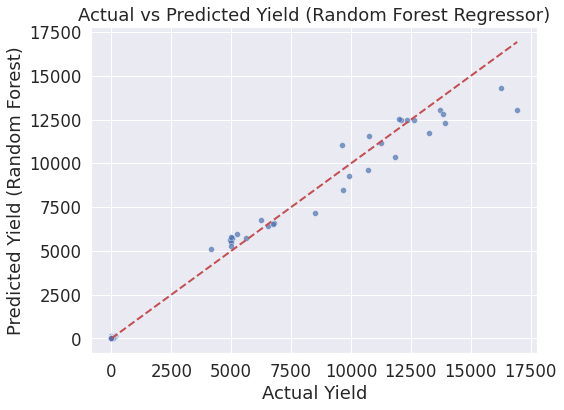

In [25]:
# Plotting Predicted vs Actual values for Random Forest Regressor
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield (Random Forest)')
plt.title('Actual vs Predicted Yield (Random Forest Regressor)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

In [28]:
# Split the data into train, validation, and test sets for cross-validation
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f'Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Train set: (11813, 94), Validation set: (3938, 94), Test set: (3938, 94)


In [30]:
# Hyperparameter tuning with GridSearchCV using validation set, then evaluate best model on test set
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use the training set for fitting, validation set for scoring
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters found:', grid_search.best_params_)

# Evaluate best model on validation set
best_rf = grid_search.best_estimator_
y_pred_val_best = best_rf.predict(X_val)
r2_val_best = r2_score(y_val, y_pred_val_best)
print(f'Validation R2 Score (best model): {r2_val_best:.4f}')

# Evaluate best model on test set
y_pred_test_best = best_rf.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_test_best)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
rmse_test_best = np.sqrt(mse_test_best)

print('\nTest Results for Best Model:')
print(f'R2 Score: {r2_test_best:.4f}')
print(f'MSE: {mse_test_best:.4f}')
print(f'RMSE: {rmse_test_best:.4f}')

Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Validation R2 Score (best model): 0.9845

Test Results for Best Model:
R2 Score: 0.9815
MSE: 14822.8617
RMSE: 121.7492

Test Results for Best Model:
R2 Score: 0.9815
MSE: 14822.8617
RMSE: 121.7492
